# Treinamento usando funções Pytorch

Vamos substituir algumas funções que fizemos no notebook do módulo 1 por funções do Pytorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F

data = torch.from_numpy(np.loadtxt('../data/age_data_3.txt')).to(torch.float32)
inputs, targets = data.T

### Camada linear Pytorch

A camada linear do Pytorch nada mais é do que uma combinação linear das variáveis de entrada. Ela possui os atributos .weight e .bias que são iguais aos atributos a e b que usamos no nosos modelo linear

In [2]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4579]], requires_grad=True)
Parameter containing:
tensor([0.7366], requires_grad=True)


In [3]:
#Modelos do Pytorch sempre esperam um tensor com tamanho NxC1xC2..., onde N é o número
#de instâncias que serão processadas e C1, C2, ... é a dimensão dos dados.
#Para imagens, os dados terão tamanho NxHxW, onde H é o número de linhas e W o número 
#de colunas das imagens. Mas nos dados deste notebook, cada instância possui um único 
#atributo (altura):
#                     dimensão Nx1
inputs = inputs.reshape(len(inputs),1)
targets = targets.reshape(len(targets),1)

res = model(inputs)
# imprime os 10 primeiros resultados
print(res[:10])
# O código acima faz a seguinte operação:
res_comp = model.weight*inputs + model.bias
print(res_comp[:10])

tensor([[0.1047],
        [0.1688],
        [0.1413],
        [0.0864],
        [0.1001],
        [0.2329],
        [0.1413],
        [0.1963],
        [0.1917],
        [0.1688]], grad_fn=<SliceBackward0>)
tensor([[0.1047],
        [0.1688],
        [0.1413],
        [0.0864],
        [0.1001],
        [0.2329],
        [0.1413],
        [0.1963],
        [0.1917],
        [0.1688]], grad_fn=<SliceBackward0>)


### Treinamento usando funções do Pytorch

Escreveremos um loop de treinamento substituindo algumas funções que implementamos por funções do Pytorch.

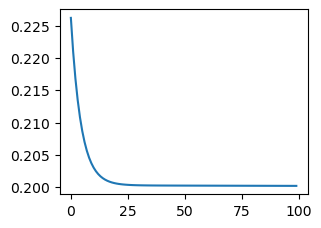

In [5]:
def train(model, inputs, targets, num_epochs, lr):

    # Entropia cruzada
    loss_func = nn.BCEWithLogitsLoss()
    # Otimizador. SGD significa Stochastic Gradient Descent. O construtor recebe 
    # como entrada os parâmetros do modelo e a taxa de aprendizado
    optim = torch.optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(0, num_epochs):
        # Apaga os gradientes
        optim.zero_grad()
        scores = model(inputs)
        loss = loss_func(scores, targets)
        # Calcula os gradientes
        loss.backward()
        # Atualiza os gradientes
        optim.step()
        losses.append(loss.item())

    return losses

with torch.no_grad():
    # [:] indica uma modificação inplace. Equivalente a
    # model.weight.fill_(19.)
    model.weight[:] = 19.
    model.bias[:] = -25.

losses = train(model, inputs, targets, num_epochs=100, lr=0.5)

plt.plot(losses)